In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import metrics

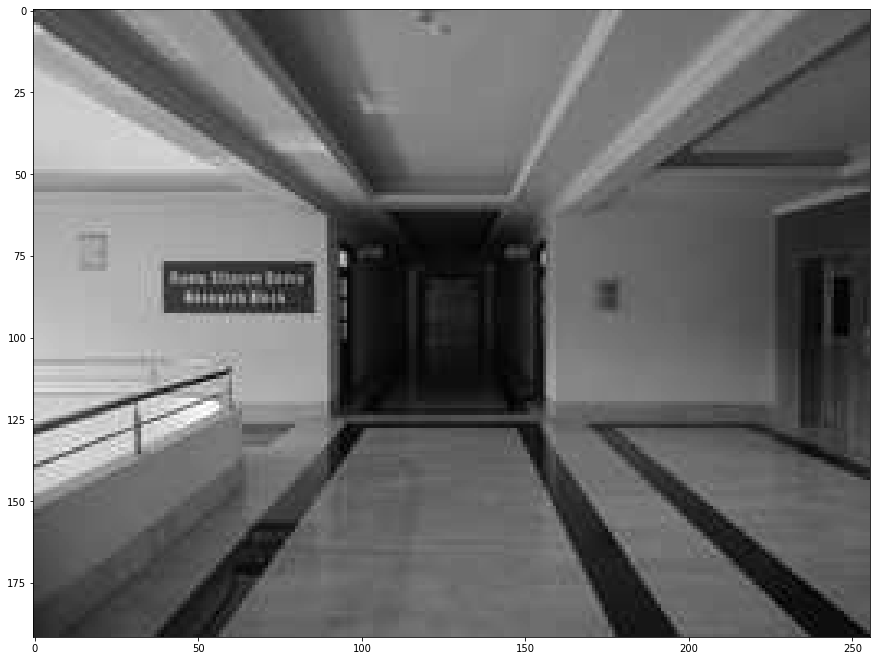

In [2]:
img= cv2.imread('original.jpg',0)
org = cv2.imread('original.jpg',0)
fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(100)
plt.imshow(img,'gray')

In [3]:
img.shape

(192, 256)

In [4]:
padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        padded_arr[i+1][j+1] = img[i][j]

for i in range (1,img.shape[1]):
    padded_arr[0][i]=padded_arr[1][i]
    padded_arr[img.shape[0]+1][i]=padded_arr[img.shape[0]][i]
for i in range (1,img.shape[0]):
    padded_arr[i][0]=padded_arr[i][1]
    padded_arr[i][img.shape[1]+1]=padded_arr[i][img.shape[1]]
padded_arr[0][0]=padded_arr[1][1]
padded_arr[img.shape[0]+1][0]=padded_arr[img.shape[0]][1]
padded_arr[img.shape[0]+1][img.shape[1]+1]=padded_arr[img.shape[0]][img.shape[1]]
padded_arr[0][img.shape[1]+1]=padded_arr[1][img.shape[1]]

In [5]:
kernel= 1/9 * np.array([[1,1,1],
                [1,1,1],
                [1,1,1]])

kernel_total=np.sum(kernel)


In [6]:
new_img=np.zeros(img.shape,'uint8')

# def convolution(m,n):
#     total=padded_arr[m-1][n-1]*kernel[0][0]
#     total=total+padded_arr[m-1][n]*kernel[0][1]
#     total=total+padded_arr[m-1][n+1]*kernel[0][2]
#     total=total+padded_arr[m][n-1]*kernel[1][0]
#     total=total+padded_arr[m][n]*kernel[1][1]
#     total=total+padded_arr[m][n+1]*kernel[1][2]
#     total=total+padded_arr[m+1][n-1]*kernel[2][0]
#     total=total+padded_arr[m+1][n]*kernel[2][1]
#     total=total+padded_arr[m+1][n+1]*kernel[2][2]    
#     return total

for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i,j]=np.sum(padded_arr[i:i+3,j:j+3]*kernel)/kernel_total

new_img1 = cv2.blur(img,(3,3))

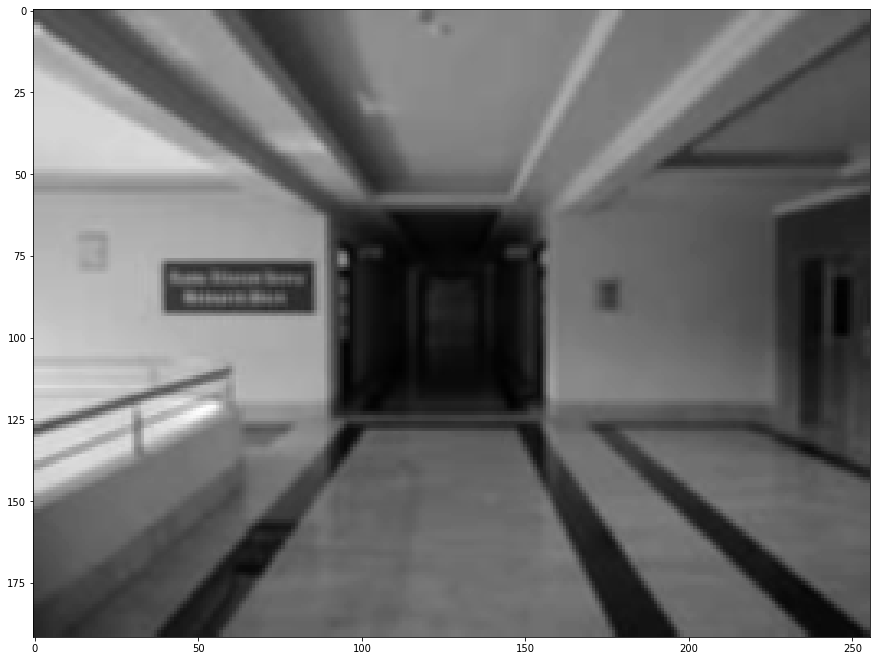

In [7]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
plt.imshow(new_img1,'gray')

In [9]:
print("PSNR(My method): ",metrics.peak_signal_noise_ratio(org,new_img))
print("PSNR(Using CV function): ",metrics.peak_signal_noise_ratio(org,new_img1))

PSNR(My method):  31.32323334378286
PSNR(Using CV function):  31.334561259180404
